"""

FACULTAD DE INGENIERÍA<br>
DEPARTAMENTO DE INGENIERÍA INDUSTRIAL<br>
ANALITICA PARA LA TOMA DE DECISIONES<br>
TRABAJO DEL CURSO - PRIMERA ENTREGA: NO SUPERVISADO <br>
Semestre 2023-02<br>

Por: : Aura Luz Moreno Díaz

---

La base de datos que utilizaremos para el trabajo mañana se encuentra en el github del curso en la carpeta _data. Se llama credit_card_clients.csv, la descripción de los campos está en credit_card_clientes_dictionary.txt

La idea es realizar reducción de dimensiones y una segmentación y responder unas preguntas de análisis con base en los resultados.

###DICCIONARIO DE DATOS:
CUST_ID: Identificación del titular de la tarjeta de crédito<br>

BALANCE: Saldo disponible para compras<br>

BALANCE_FREQUENCY: Frecuencia de actualización del saldo (donde 1 = actualización frecuente y 0 = no se actualiza con frecuencia).<br>

PURCHASES: Importe de las compras realizadas por el cliente<br>

ONEOFF_PURCHASES: Importe máximo de la compra realizada a una couta<br>

INSTALLMENTS_PURCHASES: Importe de las compras realizadas a plazos<br>

CASH_ADVANCE: Avances de Efectivo realizados por el usuario<br>

PURCHASES_FREQUENCY: Frecuencia con la que se realizan las compras (1 = compras frecuentes, 0 = compras poco frecuentes)<br>

ONEOFF_PURCHASES_FREQUENCY: frecuencia con la que se realizan las compras a una couta (1 = compras frecuentes, 0 = compras poco frecuentes)<br>

PURCHASES_INSTALLMENTS_FREQUENCY: Frecuencia con la que se realizan compras a plazos (1 = se realizan con frecuencia, 0 = no se realizan con frecuencia)<br>

CASH_ADVANCE_FREQUENCY: Frecuencia con la que se realizan avances de efectivo <br>

CASH_ADVANCE_TRX: Número de transacciones realizadas por "avances de efectivo"<br>

PURCHASES_TRX: Número de transacciones de compra realizadas<br>

CREDIT_LIMIT: Límite de la tarjeta de crédito del usuario<br>

PAYMENTS: Importe de los pagos realizados por el usuario<br>

MINIMUM_PAYMENTS: Importe mínimo de los pagos realizados por el usuario<br>

PRC_FULL_PAYMENT: Porcentaje del pago total abonado por el usuario<br>

TENURE: Tenencia del servicio de tarjeta de crédito para el usuario<br>


In [ ]:
!pip install kneed
!pip install clusteval
!pip install factor_analyzer

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import cluster
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# Para regla del codo
from kneed import KneeLocator

# Para PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer

from clusteval import clusteval ### para detecter numero de cluster automáticamente

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ANALITICA 2/NO SUPERVISADO/TRABAJO/credit_card_clients.csv')

In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.value_counts #Hago una revisión de los datos

<bound method DataFrame.value_counts of      CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_

In [ ]:
df.info() #Solo tengo uno categórico que no vale la pena tenerlo en cuenta ya que es el ID

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

##PRUEBA DE KMEANS

In [ ]:
#Quiero hacer la prueba comparando Kmeans

features=df[['BALANCE','PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PAYMENTS']] #Son las columnas que vamos a utilizar para hacer las pruebas

k=4

In [ ]:
kmedias=cluster.KMeans(n_clusters=k) ## crea el modelo
kmedias.fit(features) ## ajusta modelo a datos. COn esto queda el modelo entrenado

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
#Se genera la columna con el grupo y agregarla a la base de datos original
cluster_label= kmedias.labels_ ##numeros de los cluster
cluster_label

array([3, 0, 3, ..., 3, 3, 3], dtype=int32)

In [ ]:
df['cluster']= cluster_label ## agregar clusters a dataframe


In [ ]:
centroides=kmedias.cluster_centers_ ## centroides
centroides

array([[ 5063.72507761,   594.82095279,   234.53740773,  4209.10941303,
         3135.04193319],
       [ 2178.24288126,  4681.88423188,  1651.31998551,   537.43011802,
         5382.29444707],
       [ 5252.6110799 , 11444.06461538,  3639.66705128,  7846.81601215,
        22889.22250826],
       [  882.16028787,   593.21357988,   282.53021519,   409.63453898,
          906.39462724]])

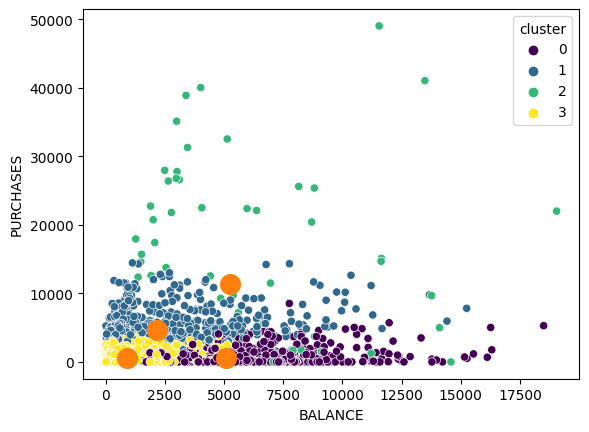

In [ ]:
### grafica de cluster y centroides
sns.scatterplot(x='BALANCE', y ='PURCHASES', hue='cluster',data=df, palette="viridis")
plt.scatter(x=centroides[:,0], y = centroides[:,1], marker='o', s=200)
plt.show()

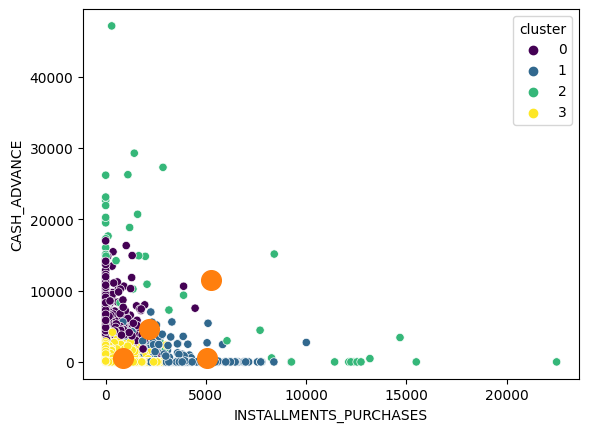

In [ ]:
### grafica de cluster y centroides
sns.scatterplot(x='INSTALLMENTS_PURCHASES', y ='CASH_ADVANCE', hue='cluster',data=df, palette="viridis")
plt.scatter(x=centroides[:,0], y = centroides[:,1], marker='o', s=200)
plt.show()

In [ ]:
x=df[['BALANCE','PURCHASES']]

In [ ]:
x_s=StandardScaler().fit_transform(x) ### se estandarizan las columnas.

In [ ]:
###identificar el mejor k - método del codo y el de silhouette

wcss=[] #METODO DEL CODO
sil=[]  #METODO DE SILUETA (Silhouette)

for k in range(1,12):
    km=cluster.KMeans(n_clusters=k, n_init=10)  #Km es el modelo para kmedias
    km.fit(x_s) #Ajustarlo con los datos escalados
    wcss.append(km.inertia_) ##inertia = wcsss, la suma de cuadrados dentro del cluster (promedio de todos los clusters)
    label=km.labels_
    if k>1: #Silouette debe empezar despues de uno, es decir, a partir de 2
        sil_avg=silhouette_score(x_s,label ) #Silhouette_score está dentro de SKLearn y dentro de metrics
        sil.append(sil_avg)

<ipython-input-97-c983f039db3b>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=np.arange(1,12), y=wcss, marker="o", palette="viridis")
<ipython-input-97-c983f039db3b>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=np.arange(2,12), y=sil, marker="o", palette="viridis")


<Axes: >

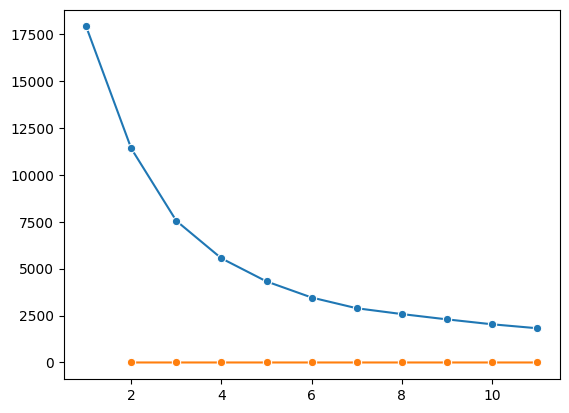

In [ ]:
sns.lineplot(x=np.arange(1,12), y=wcss, marker="o", palette="viridis")
sns.lineplot(x=np.arange(2,12), y=sil, marker="o", palette="viridis")

In [ ]:
kl=KneeLocator(x=np.arange(1,12), y=wcss,curve="convex", direction="decreasing")
kl.elbow

4

El método del codo nos arroja 4 clusters

[clusteval] >INFO> Saving data in memory.
[clusteval] >INFO> Fit with method=[kmeans], metric=[euclidean], linkage=[ward]
[clusteval] >INFO> Evaluate using silhouette.
[clusteval] >INFO:   0%|          | 0/23 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
[clusteval] >INFO:   4%|▍         | 1/23 [00:03<01:18,  3.57s/it]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
[clusteval] >INFO:   9%|▊         | 2/23 [00:07<01:13,  3.51s/it]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

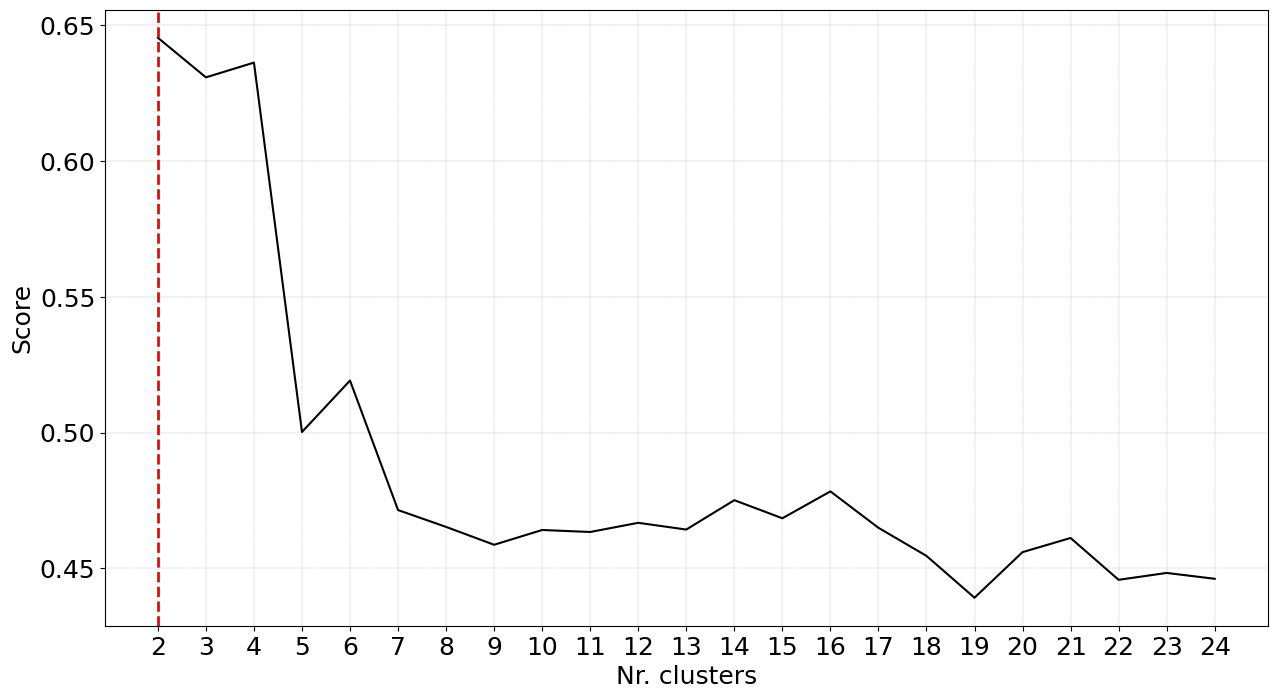

(<Figure size 1500x800 with 1 Axes>,
 <Axes: xlabel='Nr. clusters', ylabel='Score'>)

In [ ]:
cl=clusteval(cluster="kmeans", evaluate="silhouette")
cl.fit(x_s)
cl.plot()

#REDUCCION DE DIMENSIONALIDAD

##PCA

In [ ]:
df2 = df.iloc[:, 1:]  #Quito la primera columna de CUST_ID ya que es irrelevante la identificación del cliente
df2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


Al analizar las columnas de la base de datos y su contenido, se puede observar que tenemos variables porcentuales, otras de frecuencias y otras numéricas.
Por ejemplo, Balance nos indica el saldo total de la cuenta, la cual se podría escalar con las compras realizadas a una cuota, los pagos minimos y los totales<br>
Por otro lado también se podrian analizar las frecuencias y luego ver como están correlacionadas.

In [ ]:
df2 = df2.dropna() #Ya que los datos nulos no sonrepresentativos, los elimino

In [ ]:
feat_sc=StandardScaler().fit_transform(df2) #Procedo a hacer un escalado de variables
feat_sc

array([[-0.74462486, -0.37004679, -0.42918384, ..., -0.53772694,
         0.35518066,  0.5173024 ],
       [ 0.76415211,  0.06767893, -0.47320819, ...,  0.21238001,
         0.35518066, -2.21729678],
       [ 0.42660239,  0.50540465, -0.11641251, ..., -0.53772694,
         0.35518066,  0.5173024 ],
       ...,
       [-0.75297728, -0.29709491, -0.40657175, ...,  0.30614422,
        -4.22180042,  0.5173024 ],
       [-0.75772142, -0.29709491, -0.47320819, ...,  0.30614422,
        -4.22180042,  0.5173024 ],
       [-0.58627829, -1.09958965,  0.03129519, ..., -0.53772694,
        -4.22180042,  0.5173024 ]])

In [ ]:
pca=PCA(n_components=4) #el numero de componentes es el numero de variables originales
prueba= pca.fit(feat_sc) #ajuste de los datos
prueba

PCA(n_components=4)

Esto quiere decir que tenemos 4 componentes principales que capturan la mayoría de la variabilidad. PERO: Con tanta información, solo estos 4 componentes me darán la información necesaria sin sacrificar confiabilidad?

In [ ]:
################
pca = PCA(n_components=4)  # Elige el número deseado de componentes principales
principal_components = pca.fit_transform(feat_sc)

In [ ]:
############################
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_df


,PC1,PC2,PC3,PC4
0,-1.942603,-0.819439,0.481604,0.717900
1,-0.311413,3.269320,0.641310,-0.114429
2,0.742168,-0.731549,-0.010218,1.298204
3,-1.794001,-0.476648,0.275441,1.087828
4,-0.022139,-0.942437,-1.175077,0.725241
...,...,...,...,...
8631,-2.485746,-0.884758,1.622821,-1.424829
8632,-0.804844,-1.937711,-0.902802,-2.802128
8633,-1.321813,-1.636840,-0.375891,-2.353192
8634,-2.511117,-0.304007,1.047425,-1.774419


PC1 - Podria estar relacionado con la actividad general de los clientes en el uso de las TC con respecto a los gastos que realiza <br>
PC2 - Podria estar relacionado con las frecuencias y los comportamientos de compras<br>
PC3 - Pueden ser los patrones de pago y su cumpliento<br>
PC4 - Los comportamientos menos comunes ya que se notan valores negativos

In [ ]:
pca.components_ ## lambdas, vectores propios pesos de observadas sobre latentes
#las filas son las variables de salida
#Las columnas son el numero de filas de las variables originales#

array([[ 0.16668496,  0.12633124,  0.40372481,  0.34351002,  0.32312744,
         0.05005232,  0.28141525,  0.28156573,  0.23957786, -0.0215209 ,
         0.01584092,  0.37517744,  0.25088114,  0.299645  ,  0.08700854,
         0.09495195,  0.074807  , -0.18998065],
       [ 0.36273486,  0.08608833, -0.05771305, -0.02546986, -0.08967945,
         0.41151193, -0.24152976, -0.08333057, -0.21721958,  0.41178752,
         0.38748574, -0.10285567,  0.18486528,  0.17591201,  0.14111183,
        -0.20146021, -0.02141135, -0.33288499],
       [-0.1689599 , -0.44972137,  0.24912023,  0.37582161, -0.10162042,
         0.00550059, -0.35882689,  0.10739514, -0.45370302, -0.07557288,
        -0.07474907, -0.07643355,  0.09488076,  0.29569279, -0.24371832,
         0.17484877, -0.06613291,  0.03853574],
       [ 0.25997391,  0.16253284,  0.06529232,  0.12458231, -0.07461396,
        -0.26457006, -0.22177778,  0.05634676, -0.26559602, -0.26366959,
        -0.32979703, -0.0231742 ,  0.12132109, -0.096

In [ ]:
pca.explained_variance_ ## valores propios alpha, cuánta varianza es explicada
#Es uno por cada componente generado, en este caso tenemos 4

array([4.6298362 , 3.46403341, 1.5162923 , 1.28766256])

In [ ]:
ve=pca.explained_variance_ratio_ ### procentaje de variable explicada por cada componente
ve #VE es la Varianza Explicada
#En este caso el primer componente explica el 26%, el segundo el 21%, el tercero el 8% y el ultimo el 7%

array([0.26281396, 0.21630588, 0.08433123, 0.07153161])

En este caso, la varianza explicada del primer componente es del 26% y el segundo explica el 21% (aproximadamente), esto nos da casi un 48%. Esto responde la segunda pregunta-<br><br>
0.26281396 + 0.21630588 + 0.08433123 + 0.07153161 ≈ 0.63598268<br>

Se utilizan cuatro variables latentes (componentes principales) para representar los datos, y se puede explicar alrededor del 63.6 de la variación total en el comportamiento de los clientes de tarjetas de crédito mediante estas cuatro variables latentes.

In [ ]:
l = pca.transform(feat_sc) ## variables latentes
l[0] ## variables latentes para primera fila

array([-1.94260258, -0.81943807,  0.48165904,  0.71798684])

In [ ]:
l_manual=np.dot(feat_sc,pca.components_.T ,) ## calcula los l manualmente con producto punto
l_manual[0]

array([-1.94260258, -0.81943807,  0.48165904,  0.71798684])

Estas coordnadas manuales coinciden con las anteriores, por ende vamos en dirección correcta.

<ipython-input-83-43e80bce6961>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=np.arange(1,5), y=np.cumsum(ve), palette="viridis")


<Axes: >

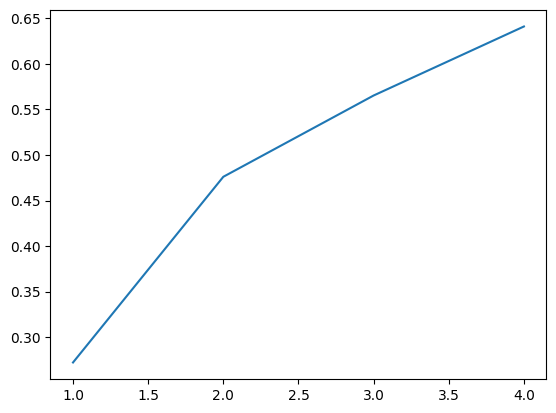

In [ ]:
sns.lineplot(x=np.arange(1,5), y=np.cumsum(ve), palette="viridis")

#Con esta grafica podemos explicar la regla del codo
#ya se puede usar el Kmeans aqui

In [ ]:
l_sel=l[:,0:2]
l_sel #Son los dos componentes seleccionados de cada fila

array([[-1.94260258, -0.81943807],
       [-0.31141187,  3.26932146],
       [ 0.74216627, -0.73155292],
       ...,
       [-1.32181191, -1.6368391 ],
       [-2.51111631, -0.30400592],
       [-0.76684608, -0.47133005]])

<Axes: >

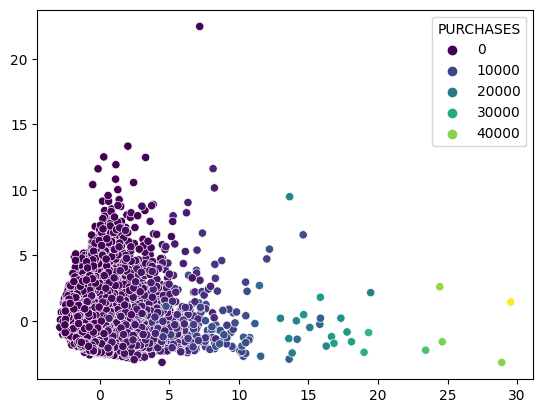

In [ ]:
####3 para graficar los datos originales con la transformación

sns.scatterplot(x=l_sel[:,0], y=l_sel[:,1], hue=df2['PURCHASES'], palette="viridis")

##FACTOR ANALYSIS - DESCARTADO<br>
Los datos obtenidos no son coherentes

Esta prueba la hago para revisar si los gráficos quedan con similitudes si se toman las mismas variables y a PURCHASES como eje

In [ ]:
fa=FactorAnalyzer(n_factors=4, rotation=None)
fa.fit(feat_sc) #Se hace el ajuste de los datos

FactorAnalyzer(n_factors=4, rotation=None, rotation_kwargs={})

In [ ]:
w=fa.loadings_ ## WWpeso de variables latentes sobre las x - Cargas factoriales
w

array([[ 0.35417593,  0.75558345,  0.16550017, -0.53678511],
       [ 0.23062223,  0.14484884,  0.24439464, -0.13474566],
       [ 0.91168247, -0.08421822, -0.37476178,  0.05648898],
       [ 0.74334476, -0.02100041, -0.47936146,  0.04789177],
       [ 0.6504473 , -0.13817573,  0.09296429,  0.01566617],
       [ 0.08340693,  0.77861319,  0.10005744,  0.23914221],
       [ 0.62809315, -0.46217419,  0.50045488,  0.09900727],
       [ 0.54832588, -0.12319773, -0.09748761,  0.00580972],
       [ 0.53587056, -0.41686315,  0.61566281,  0.10098767],
       [-0.06590505,  0.78352173,  0.13878032,  0.28740491],
       [ 0.01400297,  0.74194049,  0.17006486,  0.38847861],
       [ 0.78760594, -0.16588038,  0.07352355,  0.01199582],
       [ 0.47954285,  0.33863575, -0.04579302, -0.15676357],
       [ 0.60687694,  0.34539168, -0.23878251,  0.18505605],
       [ 0.15550259,  0.23208245,  0.10428213, -0.25173218],
       [ 0.18635083, -0.32400258, -0.03205993,  0.24207725],
       [ 0.13331513, -0.

Estas cargas factoriales deberian estar entre -1 y 1, por ende son valores aceptables.

En este caso se tienen 4 variables latentes

In [ ]:
l=fa.transform(feat_sc) ### variables latentes
l[0]


array([-0.14232277, -0.58535975, -1.170562  ,  0.06019279])

In [ ]:
lamb=fa.weights_ ## peso de variables observadas sobre las latentes
lamb

array([[-7.77714519e-02,  5.31175148e-01,  4.92879472e-01,
        -1.20856062e+00],
       [-8.23930938e-02, -5.17838319e-03,  6.23855896e-02,
        -9.23593279e-03],
       [ 2.80604514e+03, -4.54001934e+02, -1.98450135e+03,
         6.05812942e+02],
       [-2.18077339e+03,  3.52871956e+02,  1.54197829e+03,
        -4.70748172e+02],
       [-1.18681209e+03,  1.92039446e+02,  8.39350382e+02,
        -2.56234077e+02],
       [-8.70608136e-02,  2.23253704e-01,  7.73186028e-02,
         2.45326284e-01],
       [ 1.03835119e+00, -3.54410949e-01, -1.49208410e-01,
         3.07845038e-01],
       [-6.31919611e-01,  1.64523301e-01,  4.54114479e-01,
        -2.12798238e-01],
       [-7.19909194e-01,  8.85588711e-02,  1.04477622e+00,
        -1.14433732e-01],
       [ 2.73512383e-02,  1.66483217e-01,  1.00197741e-01,
         3.51252816e-01],
       [-3.55903152e-02,  2.19338044e-01,  1.39723253e-01,
         3.15217876e-01],
       [ 4.89546877e-01, -1.14729184e-01, -2.10041093e-01,
      

In [ ]:
ve=fa.get_factor_variance() ## varianza explicada, porcentaje de varianza explicada, porcentaje de varianza explicado acumulado
ve

(array([4.32109528, 3.17103603, 1.23966156, 0.83417397]),
 array([0.25418208, 0.18653153, 0.07292127, 0.04906906]),
 array([0.25418208, 0.44071361, 0.51363487, 0.56270393]))

<Axes: >

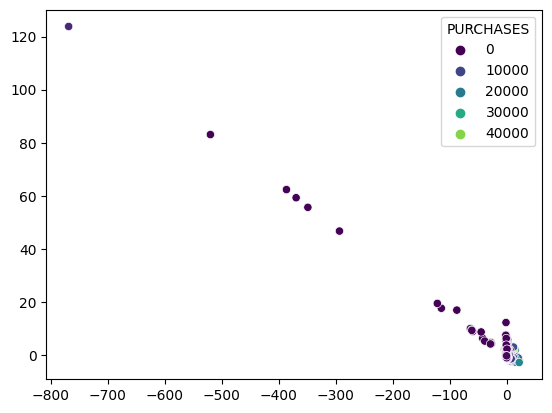

In [ ]:
sns.scatterplot(x=l[:,0], y=l[:,1], hue=df2['PURCHASES'], palette="viridis")

En este caso, creo que PCA explica mejor el agrupamiento de los datos

# PREGUNTA 1
1. Cuáles son las variables observadas más importantes en las dos variables latentes más importantes.<br>
Estas deben revisarse en el análisis factorial, que podrian ser PURCHASES" e "INSTALLMENTS_PURCHASES"

La segunda variable latente "ONEOFF_PURCHASES_FREQUENCY" y "CREDIT_LIMIT" de acuerdo con la variable observada.

En el algoritmo de Kmeans usé: BALANCE, PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE y PAYMENTS para hacer un acercamiento.<br>



# PREGUNTA 2
2. Qué porcentaje de variación va a explicar y cuántas variables latentes va a utilizar para representar los datos.<BR>
para esto usé: ve = fa.get_factor_variance() que está en el FactorAnalysis modulo [37]<br>
(array([4.32109528, 3.17103603, 1.23966156, 0.83417397]),<br>
 array([0.25418208, 0.18653153, 0.07292127, 0.04906906]),<br>
 array([0.25418208, 0.44071361, 0.51363487, 0.56270393]))<br><br>

 Varianza total: 4.32<br>
 Porcentaje de varianza explicada: 0.254<br>
 Porcentaje de varianza explicada acumulada: 0.44

#PREGUNTA 3
3. Diga cuáles son las principales diferencias entre los segmentos encontrados.
<BR>
lamb = fa.weights_
<BR>
PC1 - Podria estar relacionado con la actividad general de los clientes en el uso de las TC con respecto a los gastos que realiza <br>
PC2 - Podria estar relacionado con las frecuencias y los comportamientos de compras<br>
PC3 - Pueden ser los patrones de pago y su cumpliento<br>
PC4 - Los comportamientos menos comunes ya que se notan valores negativos

#PREGUNTA 4 - ESTRATEGIAS<BR>
4. Con base en las características identificadas en los segmentos proponga alguna estrategia que se pueda implementar en cada uno.

SEGMENTO 0 -El grupo que tienen un balance alto, en un nivel moderado de compras (PURCHASES), un bajo nivel de compras a plazos (INSTALLMENTS_PURCHASES), un bajo uso de avances de efectivo (CASH_ADVANCE) y un alto nivel de pagos (PAYMENTS). Con esto podríamos saber que tenemos un grupo de clientes que paga cumplidamente y que tiene un comportamiento óptimo, a ellos se les podrían ofrecer ofertas más atractivas con intereses bajos y que permanezcan como clientes.

SEGMENTO 1 - Para los quetienen un saldo moderado o intermedio:  realiza muchas compras (PURCHASES), compra a plazos (INSTALLMENTS_PURCHASES) con frecuencia, utiliza menos avances de efectivo (CASH_ADVANCE) y realiza pagos sustanciales (PAYMENTS).Estos clientes que pagan a tiempo pero que usan con mucha frecuencia las tarjetas de crédito son muy redituables pero también riesgosos, sin embargo se podrían ofrecer incentivos para mantener este comportamiento, como recompensas por compras continuas y programas de lealtad.

SEGMENTO 2 - Para los que tienen un saldo muy alto, es decir los clientes de alto riesgo de quedar en mora, realiza compras considerables (PURCHASES), compra a plazos (INSTALLMENTS_PURCHASES) con frecuencia, utiliza avances de efectivo (CASH_ADVANCE) y realiza pagos significativos (PAYMENTS). Estrategias que eviten los avances en efectivo y que incentiven el pago a tiempo.

SEGMENTO 3 - El último segmento muestra un saldo bajo, realiza compras limitadas (PURCHASES), compra a plazos (INSTALLMENTS_PURCHASES) con poca frecuencia, utiliza avances de efectivo (CASH_ADVANCE) y realiza pagos mínimos (PAYMENTS). Estos clientes podrían estar experimentando dificultades financieras, ya que tienen un saldo bajo y realizan pocas compras. Se podría ofrecer asesoramiento financiero y opciones de pago flexibles para ayudarlos a mejorar su situación crediticia, y sobre todo Educación Financiera.